### Same basic notes for the parser.py

In [170]:
from nltk import Tree
from nltk import PCFG
import math

treebank = []
prob_trees = []
LIMIT = 50

with open("./sequoia-corpus+fct.mrg_strict", 'rb') as f:
    idx = 0
    alllines = f.readlines()
    # split the data set, but respect the limit

    for line in alllines:
        if idx >= LIMIT:
            break

        tree = Tree.fromstring(line.decode('utf-8').strip())
        treebank.append(tree.copy())
        print tree
        if idx <= 10:
            tree.chomsky_normal_form(horzMarkov = 2) # Remove A->(B,C,D) into A->B,C+D->D
            productions += tree.productions()
            print tree  # after the chomsky normalisation
        idx += 1

( (SENT (NP (NPP Gutenberg))))
( (SENT (NP (NPP Gutenberg))))
(
  (SENT
    (NP-SUJ (DET Cette) (NC exposition))
    (VN (CLO-A_OBJ nous) (V apprend))
    (Ssub-OBJ
      (CS que)
      (PP-MOD (P des) (NP (DET le) (ADJ XIIe) (NC siecle)))
      (PONCT ,)
      (PP-MOD (P a) (NP (NPP Dammarie-sur-Saulx)))
      (PONCT ,)
      (PP-MOD (P entre) (NP (ADJ autres) (NC sites)))
      (PONCT ,)
      (NP-SUJ (DET une) (NC industrie) (AP (ADJ metallurgique)))
      (VN (V existait)))
    (PONCT .)))
(
  (SENT
    (NP-SUJ (DET Cette) (NC exposition))
    (SENT|<VN-Ssub-OBJ>
      (VN (CLO-A_OBJ nous) (V apprend))
      (SENT|<Ssub-OBJ-PONCT>
        (Ssub-OBJ
          (CS que)
          (Ssub-OBJ|<PP-MOD-PONCT>
            (PP-MOD
              (P des)
              (NP (DET le) (NP|<ADJ-NC> (ADJ XIIe) (NC siecle))))
            (Ssub-OBJ|<PONCT-PP-MOD>
              (PONCT ,)
              (Ssub-OBJ|<PP-MOD-PONCT>
                (PP-MOD (P a) (NP (NPP Dammarie-sur-Saulx)))
                

In [176]:
from nltk import treetransforms
tree = treebank[2]
tree.chomsky_normal_form(horzMarkov = 2)
print tree
tree.un_chomsky_normal_form()
print tree

(
  (SENT
    (PP-MOD
      (ADV a_peu_pres)
      (PP-MOD|<P-NP>
        (P (D au))
        (NP
          (ADJ meme)
          (NP|<NC-Ssub>
            (NC moment)
            (Ssub
              (CS que)
              (Ssub|<NP-SUJ-VN>
                (NP-SUJ (NPP Gutenberg))
                (Ssub|<VN-NP-OBJ>
                  (VN (V inventait))
                  (NP-OBJ (DET l') (NC imprimerie)))))))))
    (SENT|<PONCT-NP-SUJ>
      (PONCT ,)
      (SENT|<NP-SUJ-VN>
        (NP-SUJ (NPP Gillet) (NPP Bonnemire))
        (SENT|<VN-PP-MOD>
          (VN (V creait))
          (SENT|<PP-MOD-NP-OBJ>
            (PP-MOD (P en) (NP (NC 1450)))
            (SENT|<NP-OBJ-PP-MOD>
              (NP-OBJ
                (DET la)
                (NP-OBJ|<ADJ-NC> (ADJ premiere) (NC forge)))
              (SENT|<PP-MOD-PONCT>
                (PP-MOD (P a) (NP (NPP Saint-Dizier)))
                (SENT|<PONCT-PP-MOD>
                  (PONCT ,)
                  (SENT|<PP-MOD-PONCT>
                

In [89]:
type(productions[0])

nltk.grammar.Production

In [90]:
from nltk import Nonterminal
from nltk import induce_pcfg

S = Nonterminal('SENT')
grammar = induce_pcfg(S, productions)
print(grammar)

Grammar with 339 productions (start state = SENT)
    P+D -> 'des' [0.3]
    DET -> 'Le' [0.0243902]
    NP-SUJ|<PONCT-NP-MOD> -> PONCT NP-SUJ|<NP-MOD-PONCT> [1.0]
    PP-MOD|<NP-PONCT> -> NP PP-MOD|<PONCT-COORD> [1.0]
    P -> 'd\xe8s' [0.0238095]
    NP -> NC [0.192308]
    NC -> 'exposition' [0.016129]
    Ssub-OBJ|<PP-MOD-PONCT> -> PP-MOD Ssub-OBJ|<PONCT-PP-MOD> [0.666667]
    NPP -> 'Haironville' [0.0454545]
    NP -> DET NP|<NC-AP> [0.0384615]
    NP-SUJ -> DET NC [0.285714]
    V -> 'a' [0.235294]
    PROREL -> 'qui' [1.0]
    NC -> 'industrie' [0.016129]
    SENT|<NP-SUJ-VN> -> NP-SUJ SENT|<VN-PONCT> [0.25]
    NP-SUJ -> DET NP-SUJ|<NC-PP> [0.0714286]
    NP-OBJ|<NC-PP> -> NC PP [0.833333]
    NC -> 'conseil' [0.016129]
    NC -> 'automobilistes' [0.016129]
    SENT|<Ssub-OBJ-PONCT> -> Ssub-OBJ PONCT [1.0]
    NP -> DET NP|<NPP-PP> [0.0192308]
    NP-OBJ|<COORD-PP> -> COORD NP-OBJ|<PP-COORD> [1.0]
    SENT -> NP-SUJ SENT|<VN-NP-OBJ> [0.0909091]
    NP-MOD -> NC NP-MOD|<NC-PP> [

In [84]:
grammar.check_coverage(["endroit"])

In [86]:
grammar.check_coverage(word_tokenize("Bonjour, Je suis foo"))

ValueError: Grammar does not cover some of the input words: u"'Bonjour', 'Je', 'suis', 'foo'".

In [87]:
type(grammar)

nltk.grammar.PCFG

### The following describe how to use The Stanford's POS Tagger

In [93]:
from nltk import Production, nonterminals
S, NP, VP, PP = nonterminals('S, NP, VP, PP')
N, V, P, Det = nonterminals('N, V, P, Det')

In [53]:
from nltk.tag import StanfordPOSTagger
from nltk import word_tokenize

# Add the jar and model via their path (instead of setting environment variables):
jar = 'stanford-postagger-full-2017-06-09/stanford-postagger.jar'
model = 'stanford-postagger-full-2017-06-09/models/french.tagger'

pos_tagger = StanfordPOSTagger(model, jar, encoding='utf8')

text = pos_tagger.tag(word_tokenize("Bonjour, Je suis foo"))
print(text)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/nltk/tag/stanford.py:149: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordPOSTagger, self).__init__(*args, **kwargs)


[(u'Bonjour', u'I'), (u',', u'PUNC'), (u'Je', u'CLS'), (u'suis', u'V'), (u'foo', u'ADV')]


In [132]:
pos_tagger.tag(word_tokenize("de_loin nous avons "))

[(u'deloin', u'PROREL'), (u'nous', u'CLS'), (u'avons', u'V')]

In [131]:
lis = pos_tagger.tag(word_tokenize("de_loin nous avons "))
for i in range(len(lis)):
    
    pos = nonterminals(lis[i][1])[0]
    production_ = Production(pos, [lis[i][0]])
    productions.append(production_)
    print production_
    
S = Nonterminal('SENT')
grammar = induce_pcfg(S, productions)
grammar.check_coverage(word_tokenize("Je suis un foo"))

NC -> 'deloin'


In [130]:
import re

try:
    grammar.check_coverage(word_tokenize("à l' époque , ce cher \" Jo \" élevait jusqu'_à 120 pigeons voyageurs , et lesspécialistes n' ont pas oublié que l' un de ses champions fut de_loin le meilleur sur 500 kilomètres lors_d' un retour d' Evreux et de Bayeux !"))
except ValueError, e:
    print e
    l = e.message
    print re.findall(": .(.+).", l)[0].replace("\'", '').replace('\"', '').split(', ')
    #print re.findall("\: (*+)" ,e)

Grammar does not cover some of the input words: u'\'\\xc3\\xa0\', \'l\', "\'", \'\\xc3\\xa9poque\', \'ce\', \'cher\', \'``\', \'Jo\', \'``\', \'\\xc3\\xa9levait\', "jusqu\'_\\xc3\\xa0", \'120\', \'pigeons\', \'voyageurs\', \'lessp\\xc3\\xa9cialistes\', \'n\', "\'", \'oubli\\xc3\\xa9\', \'l\', "\'", \'ses\', \'champions\', \'de_loin\', \'meilleur\', \'sur\', \'500\', \'kilom\\xc3\\xa8tres\', \'lors_d\', "\'", \'retour\', \'d\', "\'", \'Evreux\', \'Bayeux\', \'!\''.
[u'\\\\\\xc3\\\\xa0\\', u'\\l\\', u'\\', u'\\\\\\xc3\\\\xa9poque\\', u'\\ce\\', u'\\cher\\', u'\\``\\', u'\\Jo\\', u'\\``\\', u'\\\\\\xc3\\\\xa9levait\\', u'jusqu\\_\\\\xc3\\\\xa0', u'\\120\\', u'\\pigeons\\', u'\\voyageurs\\', u'\\lessp\\\\xc3\\\\xa9cialistes\\', u'\\n\\', u'\\', u'\\oubli\\\\xc3\\\\xa9\\', u'\\l\\', u'\\', u'\\ses\\', u'\\champions\\', u'\\de_loin\\', u'\\meilleur\\', u'\\sur\\', u'\\500\\', u'\\kilom\\\\xc3\\\\xa8tres\\', u'\\lors_d\\', u'\\', u'\\retour\\', u'\\d\\', u'\\', u'\\Evreux\\', u'\\Bayeux\\', u

In [122]:
unknown

[u'vraiment', u'pas']

In [124]:
def check_unknown_words(line, grammar):
    try:
        grammar.check_coverage(word_tokenize(line))
    except ValueError, e:
        print e
        l = e.message
        unknown = re.findall(": .(.+).", l)[0].replace("\'", '').replace('\"', '').split(', ')
        
    return unknown

def update_grammar(productions, unknown):
    lis = pos_tagger.tag(unknown)
    for i in range(len(lis)):
        pos = nonterminals(lis[i][1])[0]
        production_ = Production(pos, [lis[i][0]])
        productions.append(production_)
        print production_, "added to productions"

    S = Nonterminal('SENT')
    grammar = induce_pcfg(S, productions)
    
    return grammar

In [125]:
line = "c est pas un probleme je crois que vous croyez."
grammar.check_coverage(word_tokenize(line))

ValueError: Grammar does not cover some of the input words: u"'c', 'est', 'pas', 'probleme', 'je', 'crois', 'vous', 'croyez'".

In [127]:
unknown = check_unknown_words(line)
up_gram = update_grammar(productions, unknown)
up_gram.check_coverage(word_tokenize(line))

Grammar does not cover some of the input words: u"'c', 'est', 'pas', 'probleme', 'je', 'crois', 'vous', 'croyez'".
DET -> 'c' added to productions
V -> 'est' added to productions
ADV -> 'pas' added to productions
ADJ -> 'probleme' added to productions
CLS -> 'je' added to productions
V -> 'crois' added to productions
CLS -> 'vous' added to productions
VIMP -> 'croyez' added to productions


### The following describe how to use a toy data set to create a parser using NLTK


In [133]:
import nltk
nltk.download('treebank')

from nltk.corpus import treebank

[nltk_data] Downloading package treebank to /Users/ab/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [135]:
productions = []
for item in treebank.fileids()[:2]:
    for tree in treebank.parsed_sents(item):
        
        #tree.collapse_unary(collapsePOS = True)# Remove branches A-B-C into A-B+C
        tree.chomsky_normal_form(horzMarkov = 2)# Remove A->(B,C,D) into A->B,C+D->D
        print tree
        productions += tree.productions()

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (NP-SBJ|<,-ADJP>
      (, ,)
      (NP-SBJ|<ADJP-,>
        (ADJP (NP (CD 61) (NNS years)) (JJ old))
        (, ,))))
  (S|<VP-.>
    (VP
      (MD will)
      (VP
        (VB join)
        (VP|<NP-PP-CLR>
          (NP (DT the) (NN board))
          (VP|<PP-CLR-NP-TMP>
            (PP-CLR
              (IN as)
              (NP
                (DT a)
                (NP|<JJ-NN> (JJ nonexecutive) (NN director))))
            (NP-TMP (NNP Nov.) (CD 29))))))
    (. .)))
(S
  (NP-SBJ (NNP Mr.) (NNP Vinken))
  (S|<VP-.>
    (VP
      (VBZ is)
      (NP-PRD
        (NP (NN chairman))
        (PP
          (IN of)
          (NP
            (NP (NNP Elsevier) (NNP N.V.))
            (NP|<,-NP>
              (, ,)
              (NP
                (DT the)
                (NP|<NNP-VBG>
                  (NNP Dutch)
                  (NP|<VBG-NN> (VBG publishing) (NN group)))))))))
    (. .)))
(S
  (NP-SBJ-1
    (NP (NNP Rudolph) (NNP Agnew))


In [136]:
productions

[S -> NP-SBJ S|<VP-.>,
 NP-SBJ -> NP NP-SBJ|<,-ADJP>,
 NP -> NNP NNP,
 NNP -> 'Pierre',
 NNP -> 'Vinken',
 NP-SBJ|<,-ADJP> -> , NP-SBJ|<ADJP-,>,
 , -> ',',
 NP-SBJ|<ADJP-,> -> ADJP ,,
 ADJP -> NP JJ,
 NP -> CD NNS,
 CD -> '61',
 NNS -> 'years',
 JJ -> 'old',
 , -> ',',
 S|<VP-.> -> VP .,
 VP -> MD VP,
 MD -> 'will',
 VP -> VB VP|<NP-PP-CLR>,
 VB -> 'join',
 VP|<NP-PP-CLR> -> NP VP|<PP-CLR-NP-TMP>,
 NP -> DT NN,
 DT -> 'the',
 NN -> 'board',
 VP|<PP-CLR-NP-TMP> -> PP-CLR NP-TMP,
 PP-CLR -> IN NP,
 IN -> 'as',
 NP -> DT NP|<JJ-NN>,
 DT -> 'a',
 NP|<JJ-NN> -> JJ NN,
 JJ -> 'nonexecutive',
 NN -> 'director',
 NP-TMP -> NNP CD,
 NNP -> 'Nov.',
 CD -> '29',
 . -> '.',
 S -> NP-SBJ S|<VP-.>,
 NP-SBJ -> NNP NNP,
 NNP -> 'Mr.',
 NNP -> 'Vinken',
 S|<VP-.> -> VP .,
 VP -> VBZ NP-PRD,
 VBZ -> 'is',
 NP-PRD -> NP PP,
 NP -> NN,
 NN -> 'chairman',
 PP -> IN NP,
 IN -> 'of',
 NP -> NP NP|<,-NP>,
 NP -> NNP NNP,
 NNP -> 'Elsevier',
 NNP -> 'N.V.',
 NP|<,-NP> -> , NP,
 , -> ',',
 NP -> DT NP|<NNP-VBG>

In [137]:
from nltk import Nonterminal
from nltk import induce_pcfg

S = Nonterminal('S')
grammar = induce_pcfg(S, productions)
print(grammar)

Grammar with 86 productions (start state = S)
    NNP -> 'Agnew' [0.0714286]
    JJ -> 'industrial' [0.142857]
    VP -> VBZ NP-PRD [0.2]
    VP|<PP-CLR-NP-TMP> -> PP-CLR NP-TMP [1.0]
    NP -> NN [0.0666667]
    NP -> NNP NNP [0.2]
    VP -> MD VP [0.2]
    NP-TMP -> NNP CD [1.0]
    NP-SBJ -> -NONE- [0.333333]
    . -> '.' [1.0]
    NN -> 'group' [0.142857]
    NN -> 'conglomerate' [0.142857]
    DT -> 'a' [0.4]
    IN -> 'of' [0.75]
    NP|<NNP-NNP> -> NNP NNP [0.5]
    CC -> 'and' [1.0]
    NP|<VBG-NN> -> VBG NN [1.0]
    NNP -> 'Rudolph' [0.0714286]
    NP -> NP PP [0.0666667]
    NNP -> 'PLC' [0.0714286]
    NP-SBJ|<,-ADJP> -> , NP-SBJ|<ADJP-,> [1.0]
    CD -> '61' [0.333333]
    PP -> IN NP [1.0]
    NP|<JJ-NN> -> JJ NN [1.0]
    JJ -> 'nonexecutive' [0.285714]
    NNP -> 'N.V.' [0.0714286]
    NNS -> 'years' [1.0]
    VP -> VB VP|<NP-PP-CLR> [0.2]
    NNP -> 'Dutch' [0.0714286]
    NNP -> 'Mr.' [0.0714286]
    NP -> DT NP|<JJ-JJ> [0.0666667]
    NP -> DT NP|<NNP-VBG> [0.0666667

In [9]:
tree.collapse_unary?

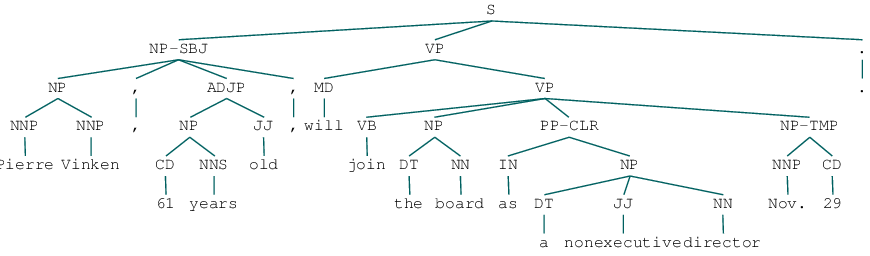

In [138]:
treebank.parsed_sents('wsj_0001.mrg')[0]

In [11]:
treebank.parsed_sents('wsj_0001.mrg')[0].leaves()

[u'Pierre',
 u'Vinken',
 u',',
 u'61',
 u'years',
 u'old',
 u',',
 u'will',
 u'join',
 u'the',
 u'board',
 u'as',
 u'a',
 u'nonexecutive',
 u'director',
 u'Nov.',
 u'29',
 u'.']

In [139]:
grammar

<Grammar with 86 productions>

In [140]:

import sys, time
from nltk import tokenize
from nltk.grammar import toy_pcfg1
from nltk.parse import pchart
from nltk.parse import ViterbiParser

demos = [('I saw John with my telescope', toy_pcfg1)]
sent, grammar = demos[0]
tokens = sent.split()
parser = ViterbiParser(grammar)
parser.trace(3)
t = time.time()
parses = parser.parse_all(tokens)
parses

Inserting tokens into the most likely constituents table...
   Insert: |=.....| I
   Insert: |.=....| saw
   Insert: |..=...| John
   Insert: |...=..| with
   Insert: |....=.| my
   Insert: |.....=| telescope
Finding the most likely constituents spanning 1 text elements...
   Insert: |=.....| NP -> 'I' [0.15]                0.1500000000 
   Insert: |.=....| V -> 'saw' [0.65]               0.6500000000 
   Insert: |.=....| VP -> V [0.2]                   0.1300000000 
   Insert: |..=...| NP -> 'John' [0.1]              0.1000000000 
   Insert: |...=..| P -> 'with' [0.61]              0.6100000000 
   Insert: |....=.| Det -> 'my' [0.2]               0.2000000000 
   Insert: |.....=| N -> 'telescope' [0.5]          0.5000000000 
Finding the most likely constituents spanning 2 text elements...
   Insert: |==....| S -> NP VP [1.0]                0.0195000000 
   Insert: |.==...| VP -> V NP [0.7]                0.0455000000 
   Insert: |....==| NP -> Det N [0.5]               0.0500000000 
F

[ProbabilisticTree('S', [ProbabilisticTree('NP', ['I']) (p=0.15), ProbabilisticTree('VP', [ProbabilisticTree('V', ['saw']) (p=0.65), ProbabilisticTree('NP', [ProbabilisticTree('NP', ['John']) (p=0.1), ProbabilisticTree('PP', [ProbabilisticTree('P', ['with']) (p=0.61), ProbabilisticTree('NP', [ProbabilisticTree('Det', ['my']) (p=0.2), ProbabilisticTree('N', ['telescope']) (p=0.5)]) (p=0.05)]) (p=0.0305)]) (p=0.0007625)]) (p=0.00034693749999999997)]) (p=5.204062499999999e-05)]

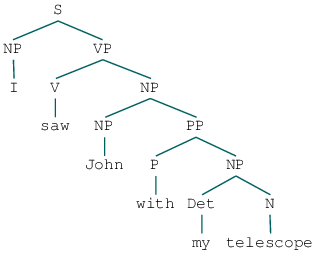

In [141]:
parses[0]

In [26]:
for parse in parses:
    print parse

(S
  (NP I)
  (VP
    (V saw)
    (NP
      (NP John)
      (PP (P with) (NP (Det my) (N telescope)))))) (p=5.20406e-05)


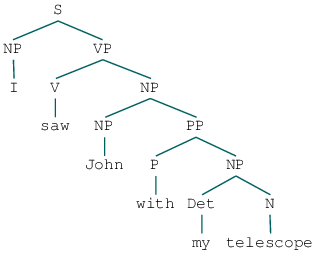

In [166]:
parse

In [163]:
" ".join(parse.__str__().replace("\n", '').split()) 

'(S (NP I) (VP (V saw) (NP (NP John) (PP (P with) (NP (Det my) (N telescope)))))) (p=5.20406e-05)'

In [55]:
pos_tagger.tag(word_tokenize("Je"))

[(u'Je', u'CLS')]